In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=dd9f9df9ba960b8fedceeb49aad7f504fbf818ced4199704e5ad947221c07b1a
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("city_day.csv")
df.head(5)

,City,Date,PM2,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
import pandas as pd

# Assuming you've loaded the CSV file into a DataFrame
df = pd.read_csv("city_day.csv")

# Display rows with complete data (no missing values)
df_complete_rows = df.dropna()

# Print the first 5 rows of the DataFrame with complete rows
print(df_complete_rows.head(5))


           City        Date    PM2    PM10    NO    NO2    NOx    NH3    CO  \
2123  Amaravati  25-11-2017  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2124  Amaravati  26-11-2017  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
2125  Amaravati  27-11-2017  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
2126  Amaravati  28-11-2017  64.18  104.09  2.56  28.07  17.01  11.42  0.09   
2127  Amaravati  29-11-2017  72.47  114.84  5.23  23.20  16.59  12.25  0.16   

        SO2      O3  Benzene  Toluene  Xylene    AQI Air_quality  
2123  15.24  127.09     0.20     6.50    0.06  184.0    Moderate  
2124  26.96  117.44     0.22     7.95    0.08  197.0    Moderate  
2125  33.59  111.81     0.29     7.63    0.12  198.0    Moderate  
2126  19.00  138.18     0.17     5.02    0.07  188.0    Moderate  
2127  10.55  109.74     0.21     4.71    0.08  173.0    Moderate  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   Date         29531 non-null  object 
 2   PM2          24933 non-null  float64
 3   PM10         18391 non-null  float64
 4   NO           25949 non-null  float64
 5   NO2          25946 non-null  float64
 6   NOx          25346 non-null  float64
 7   NH3          19203 non-null  float64
 8   CO           27472 non-null  float64
 9   SO2          25677 non-null  float64
 10  O3           25509 non-null  float64
 11  Benzene      23908 non-null  float64
 12  Toluene      21490 non-null  float64
 13  Xylene       11422 non-null  float64
 14  AQI          24850 non-null  float64
 15  Air_quality  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (29531, 16)


In [ ]:
df = df.drop(columns=['City','Date'])
target = df.loc[:,'Air_quality']

In [ ]:
non_null_counts = pd.DataFrame([(column, df[column].count()) for column in df.columns], columns=['Column', 'NonNullCount'])
print(non_null_counts)

         Column  NonNullCount
0           PM2         24933
1          PM10         18391
2            NO         25949
3           NO2         25946
4           NOx         25346
5           NH3         19203
6            CO         27472
7           SO2         25677
8            O3         25509
9       Benzene         23908
10      Toluene         21490
11       Xylene         11422
12          AQI         24850
13  Air_quality         24850


In [ ]:
df['PM2']=df['PM2'].fillna((df['PM2'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].mean()))
df['NOx']=df['NOx'].fillna((df['NOx'].mean()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].mean()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))
df['AQI']=df['AQI'].fillna((df['AQI'].median()))
df['Air_quality']=df['Air_quality'].fillna('Moderate')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2          29531 non-null  float64
 1   PM10         29531 non-null  float64
 2   NO           29531 non-null  float64
 3   NO2          29531 non-null  float64
 4   NOx          29531 non-null  float64
 5   NH3          29531 non-null  float64
 6   CO           29531 non-null  float64
 7   SO2          29531 non-null  float64
 8   O3           29531 non-null  float64
 9   Benzene      29531 non-null  float64
 10  Toluene      29531 non-null  float64
 11  Xylene       29531 non-null  float64
 12  AQI          29531 non-null  float64
 13  Air_quality  29531 non-null  object 
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [ ]:
unique_aqi_buckets = df['Air_quality'].unique()
print(unique_aqi_buckets)

['Moderate' 'Poor' 'Very Poor' 'Severe' 'Satisfactory' 'Good']


In [ ]:
Air_quality = df['Air_quality'].value_counts()
print(Air_quality)

Moderate        13510
Satisfactory     8224
Poor             2781
Very Poor        2337
Good             1341
Severe           1338
Name: Air_quality, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(df.drop('Air_quality', axis=1), df['Air_quality'])
print(X_resampled.shape)
print(y_resampled.shape)
df_new = pd.concat([X_resampled, y_resampled], axis=1)
df_new.head()
df_new.info()

(81060, 13)
(81060,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81060 entries, 0 to 81059
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PM2          81060 non-null  float64
 1   PM10         81060 non-null  float64
 2   NO           81060 non-null  float64
 3   NO2          81060 non-null  float64
 4   NOx          81060 non-null  float64
 5   NH3          81060 non-null  float64
 6   CO           81060 non-null  float64
 7   SO2          81060 non-null  float64
 8   O3           81060 non-null  float64
 9   Benzene      81060 non-null  float64
 10  Toluene      81060 non-null  float64
 11  Xylene       81060 non-null  float64
 12  AQI          81060 non-null  float64
 13  Air_quality  81060 non-null  object 
dtypes: float64(13), object(1)
memory usage: 8.7+ MB


In [ ]:
Air_quality = df_new['Air_quality'].value_counts()
print(Air_quality)

Moderate        13510
Poor            13510
Very Poor       13510
Severe          13510
Satisfactory    13510
Good            13510
Name: Air_quality, dtype: int64


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=10)
selector.fit(df_new.drop('Air_quality', axis=1), df_new['Air_quality'])
selected_features = df_new.drop('Air_quality', axis=1).columns[selector.get_support()]
print(selected_features)

Index(['PM2', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'Toluene', 'AQI'], dtype='object')


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

spark = SparkSession.builder.appName("spark").getOrCreate()

data = spark.createDataFrame(df_new)

target_col = "Air_quality"
feature_cols = selected_features

indexer = StringIndexer(inputCol=target_col, outputCol="label")
data = indexer.fit(data).transform(data)

vector_assembler = VectorAssembler(inputCols=feature_cols.tolist(), outputCol="features")
data = vector_assembler.transform(data)

train_data, test_data = data.randomSplit([0.7, 0.3], seed=123)


In [ ]:
train_count = train_data.count()

test_count = test_data.count()

print("Training set count:", train_count)
print("Testing set count:", test_count)

Training set count: 56756
Testing set count: 24304


In [ ]:
test_data.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0| 4089|
|  1.0| 4070|
|  4.0| 4018|
|  3.0| 4076|
|  2.0| 4029|
|  5.0| 4022|
+-----+-----+



In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
spark = SparkSession.builder.appName("SVMClassifier").getOrCreate()
# Create and train an SVM classifier using OneVsRest
svm = LinearSVC(maxIter=50, tol=1e-4, labelCol="label", featuresCol="features")
ovr_classifier = OneVsRest(classifier=svm,labelCol="label", featuresCol="features")


# Train the OneVsRest classifier
model = ovr_classifier.fit(train_data)

# Make predictions on the test data
predictions_svm = model.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
fm = evaluator.evaluate(predictions_svm)

# Print the accuracy of the model
print(f"Avg-F-measure: {fm}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels = predictions_svm.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)

print(f"Accuracy: {metrics.accuracy}")
# Print precision, recall, and F1 for each class
print("Per-class metrics:")
for label in sorted(set(predictions_svm.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics.precision(label)}")
    print(f"Recall: {metrics.recall(label)}")
    print(f"F1-score: {metrics.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics:")
print(f"Weighted precision: {metrics.weightedPrecision}")
print(f"Weighted recall: {metrics.weightedRecall}")
print(f"Weighted F1-score: {metrics.weightedFMeasure()}")

# Stop the Spark session
#spark.stop()

Avg-F-measure: 0.5389796377972252


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Accuracy: 0.5639400921658986
Per-class metrics:
Class 0.0:
Precision: 0.6972111553784861
Recall: 0.9415505013450721
F1-score: 0.8011653313911143

Class 1.0:
Precision: 0.4625637005096041
Recall: 0.28992628992628994
F1-score: 0.35644162513215527

Class 2.0:
Precision: 0.401482748788138
Recall: 0.3494663688260114
F1-score: 0.37367303609341823

Class 3.0:
Precision: 0.6215880893300249
Recall: 0.24582924435721296
F1-score: 0.3523206751054852

Class 4.0:
Precision: 0.8509106310885218
Recall: 1.0
F1-score: 0.9194508009153318

Class 5.0:
Precision: 0.3517996870109546
Recall: 0.5589259075087022
F1-score: 0.431809450633884

Average metrics:
Weighted precision: 0.5644583187650201
Weighted recall: 0.5639400921658986
Weighted F1-score: 0.5389796377972252


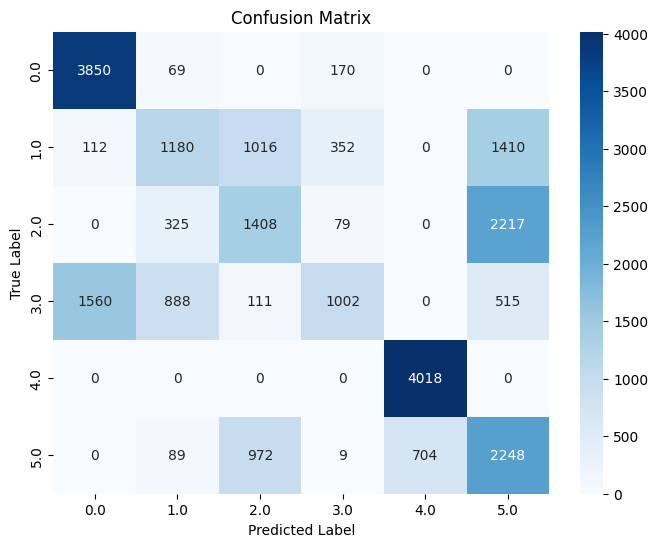

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import OneVsRest
from pyspark.sql import SparkSession


predictions_pd = predictions_svm.select("prediction", "label").toPandas()

# Calculate confusion matrix
conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ... (the rest of your existing code)



In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DecissionTree").getOrCreate()

# Create a DecisionTree classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Create a pipeline with the DecisionTree stage
pipeline = Pipeline(stages=[dt])

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score = evaluator_f1.evaluate(predictions)

# Print the F1-score of the model
print(f"Avg-F1 score: {f1_score}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator_accuracy.evaluate(predictions)

# Print accuracy
print(f"Accuracy: {accuracy}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels = predictions.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Print precision, recall, and F1 for each class
print("Per-class metrics:")
for label in sorted(set(predictions.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics.precision(label)}")
    print(f"Recall: {metrics.recall(label)}")
    print(f"F1-score: {metrics.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics:")
print(f"Weighted precision: {metrics.weightedPrecision}")
print(f"Weighted recall: {metrics.weightedRecall}")
print(f"Weighted F1-score: {metrics.weightedFMeasure()}")

# Stop the Spark session
# spark.stop()


Avg-F1 score: 0.9555592456477229
Accuracy: 0.9555217248189598


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Per-class metrics:
Class 0.0:
Precision: 0.926497277676951
Recall: 0.9987772071411103
F1-score: 0.9612804519242086

Class 1.0:
Precision: 1.0
Recall: 0.9206388206388206
F1-score: 0.9586798004349494

Class 2.0:
Precision: 0.9044943820224719
Recall: 0.9990071978158352
F1-score: 0.9494044108975116

Class 3.0:
Precision: 0.9554367201426025
Recall: 0.9205103042198234
F1-score: 0.9376483818568037

Class 4.0:
Precision: 1.0
Recall: 0.9619213539074166
F1-score: 0.9805911455029811

Class 5.0:
Precision: 0.9598157153826465
Recall: 0.9323719542516161
F1-score: 0.9458948164964057

Average metrics:
Weighted precision: 0.9576775062606914
Weighted recall: 0.9555217248189598
Weighted F1-score: 0.9555592456477229


In [ ]:
test_data.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0| 4089|
|  1.0| 4070|
|  4.0| 4018|
|  3.0| 4076|
|  2.0| 4029|
|  5.0| 4022|
+-----+-----+



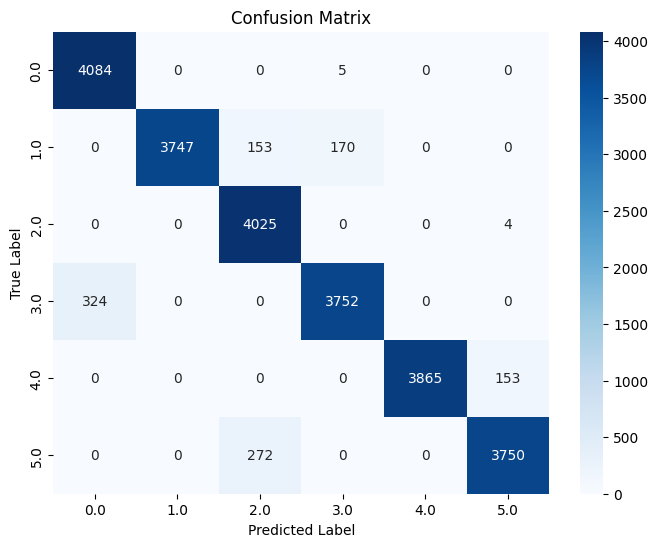

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

predictions_pd = predictions.select("prediction", "label").toPandas()

# Calculate confusion matrix
conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("RandomForest").getOrCreate()

# Create a RandomForest classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features")

# Create a pipeline with the RandomForest stage
pipeline_rf = Pipeline(stages=[rf])

# Fit the pipeline to the training data
model_rf = pipeline_rf.fit(train_data)

# Make predictions on the test data
predictions_rf = model_rf.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1_rf = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score_rf = evaluator_f1_rf.evaluate(predictions_rf)

# Print the F1-score of the model
print(f"Avg-F1 score for Random Forest: {f1_score_rf}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy_rf = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy_rf = evaluator_accuracy_rf.evaluate(predictions_rf)

# Print accuracy
print(f"Accuracy for Random Forest: {accuracy_rf}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels_rf = predictions_rf.select("prediction", "label").rdd
metrics_rf = MulticlassMetrics(predictionAndLabels_rf)

# Print precision, recall, and F1 for each class
print("Per-class metrics for Random Forest:")
for label in sorted(set(predictions_rf.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics_rf.precision(label)}")
    print(f"Recall: {metrics_rf.recall(label)}")
    print(f"F1-score: {metrics_rf.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics for Random Forest:")
print(f"Weighted precision: {metrics_rf.weightedPrecision}")
print(f"Weighted recall: {metrics_rf.weightedRecall}")
print(f"Weighted F1-score: {metrics_rf.weightedFMeasure()}")

# Stop the Spark session
# spark.stop()

Avg-F1 score for Random Forest: 0.9427317206154092
Accuracy for Random Forest: 0.9421082949308756
Per-class metrics for Random Forest:
Class 0.0:
Precision: 1.0
Recall: 0.9109806798728295
F1-score: 0.9534169439467622

Class 1.0:
Precision: 0.9369391824526421
Recall: 0.9235872235872236
F1-score: 0.9302152932442465

Class 2.0:
Precision: 0.9986401958118031
Recall: 0.9113924050632911
F1-score: 0.9530236179600311

Class 3.0:
Precision: 0.8553621319578767
Recall: 0.9764474975466143
F1-score: 0.9119028525604308

Class 4.0:
Precision: 0.9994666666666666
Recall: 0.9328023892483823
F1-score: 0.964984552008239

Class 5.0:
Precision: 0.8943614887452641
Recall: 0.9977623073097961
F1-score: 0.9432365730403102

Average metrics for Random Forest:
Weighted precision: 0.9473872138647313
Weighted recall: 0.9421082949308757
Weighted F1-score: 0.9427317206154092
+-----+-----+
|label|count|
+-----+-----+
|  0.0| 4089|
|  1.0| 4070|
|  4.0| 4018|
|  3.0| 4076|
|  2.0| 4029|
|  5.0| 4022|
+-----+-----+



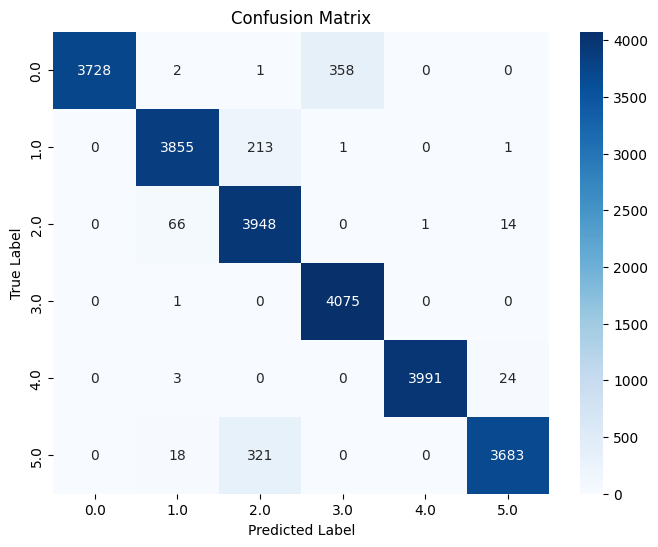

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

predictions_pd = predictions_rf.select("prediction", "label").toPandas()

# Calculate confusion matrix
conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql import SparkSession


spark = SparkSession.builder.appName("NaiveBayesExample").getOrCreate()


# Create a Naive Bayes classifier
nb = NaiveBayes(labelCol="label", featuresCol="features")

# Create a pipeline with the Naive Bayes stage
pipeline_nb = Pipeline(stages=[nb])

# Fit the pipeline to the training data
model_nb = pipeline_nb.fit(train_data)

# Make predictions on the test data
predictions_nb = model_nb.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1_nb = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score_nb = evaluator_f1_nb.evaluate(predictions_nb)

# Print the F1-score of the Naive Bayes model
print(f"Avg-F1 score for Naive Bayes: {f1_score_nb}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy_nb = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy_nb = evaluator_accuracy_nb.evaluate(predictions_nb)

# Print accuracy
print(f"Accuracy for Naive Bayes: {accuracy_nb}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels_nb = predictions_nb.select("prediction", "label").rdd
metrics_nb = MulticlassMetrics(predictionAndLabels_nb)

# Print precision, recall, and F1 for each class
print("Per-class metrics for Naive Bayes:")
for label in sorted(set(predictions_nb.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics_nb.precision(label)}")
    print(f"Recall: {metrics_nb.recall(label)}")
    print(f"F1-score: {metrics_nb.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics for Naive Bayes:")
print(f"Weighted precision: {metrics_nb.weightedPrecision}")
print(f"Weighted recall: {metrics_nb.weightedRecall}")
print(f"Weighted F1-score: {metrics_nb.weightedFMeasure()}")

# Stop the Spark session
# spark.stop()


Avg-F1 score for Naive Bayes: 0.47118206235059534
Accuracy for Naive Bayes: 0.4735023041474654


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Per-class metrics for Naive Bayes:
Class 0.0:
Precision: 0.6291618828932262
Recall: 0.6700904866715578
F1-score: 0.6489815253434391

Class 1.0:
Precision: 0.413755929279862
Recall: 0.4714987714987715
F1-score: 0.4407441433164906

Class 2.0:
Precision: 0.35640950425344675
Recall: 0.3015636634400596
F1-score: 0.3267007260016133

Class 3.0:
Precision: 0.42421577250073295
Recall: 0.35500490677134444
F1-score: 0.3865366635501536

Class 4.0:
Precision: 0.6088510170423309
Recall: 0.5512692882030861
F1-score: 0.5786311389759665

Class 5.0:
Precision: 0.40634658973830623
Recall: 0.4903033316757832
F1-score: 0.44439436619718314

Average metrics for Naive Bayes:
Weighted precision: 0.4732717381119617
Weighted recall: 0.4735023041474654
Weighted F1-score: 0.47118206235059534


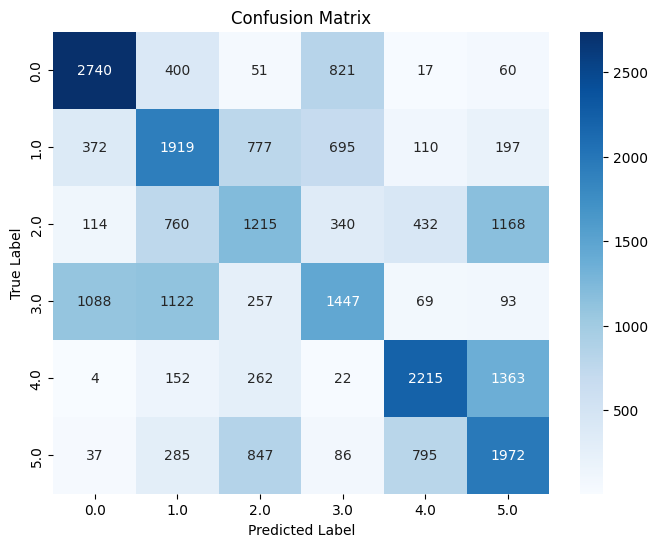

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

predictions_pd = predictions_nb .select("prediction", "label").toPandas()

# Calculate confusion matrix
conf_matrix = pd.crosstab(predictions_pd['label'], predictions_pd['prediction'], rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(predictions_pd['label'])),
            yticklabels=sorted(set(predictions_pd['label'])))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
##Ensemble method
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession


# Load and preprocess your data into 'train_data' and 'test_data'
# Assuming 'label' is your label column and 'features' is your features column

# Create a RandomForest classifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)

# Fit the RandomForest model to the training data
model_rf = rf.fit(train_data)

# Make predictions on the test data
predictions_rf = model_rf.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1_rf = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score_rf = evaluator_f1_rf.evaluate(predictions_rf)

# Print the F1-score of the RandomForest model
print(f"Avg-F1 score for Random Forest: {f1_score_rf}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy_rf = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy_rf = evaluator_accuracy_rf.evaluate(predictions_rf)

# Print accuracy
print(f"Accuracy for Random Forest: {accuracy_rf}")


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

# Create or retrieve a Spark session
spark = SparkSession.builder.appName("LogisticRegressionExample").getOrCreate()

# Assuming you have 'train_data' and 'test_data' DataFrames with 'label' and 'features' columns

# Create a Logistic Regression classifier
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10, regParam=0.01)

# Create a pipeline with the Logistic Regression stage
pipeline = Pipeline(stages=[lr])

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using a MulticlassClassificationEvaluator for F1
evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score = evaluator_f1.evaluate(predictions)

# Print the F1-score of the model
print(f"Avg-F1 score: {f1_score}")

# Now, use the same MulticlassClassificationEvaluator for accuracy
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator_accuracy.evaluate(predictions)

# Print accuracy
print(f"Accuracy: {accuracy}")

# Use MulticlassMetrics to compute per-class metrics
predictionAndLabels = predictions.select("prediction", "label").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Print precision, recall, and F1 for each class
print("Per-class metrics:")
for label in sorted(set(predictions.select("label").rdd.flatMap(lambda x: x).collect())):
    print(f"Class {label}:")
    print(f"Precision: {metrics.precision(label)}")
    print(f"Recall: {metrics.recall(label)}")
    print(f"F1-score: {metrics.fMeasure(label)}")
    print()

# Print the average metrics
print("Average metrics:")
print(f"Weighted precision: {metrics.weightedPrecision}")
print(f"Weighted recall: {metrics.weightedRecall}")
print(f"Weighted F1-score: {metrics.weightedFMeasure()}")

# Stop the Spark session
spark.stop()


Py4JJavaError: ignored

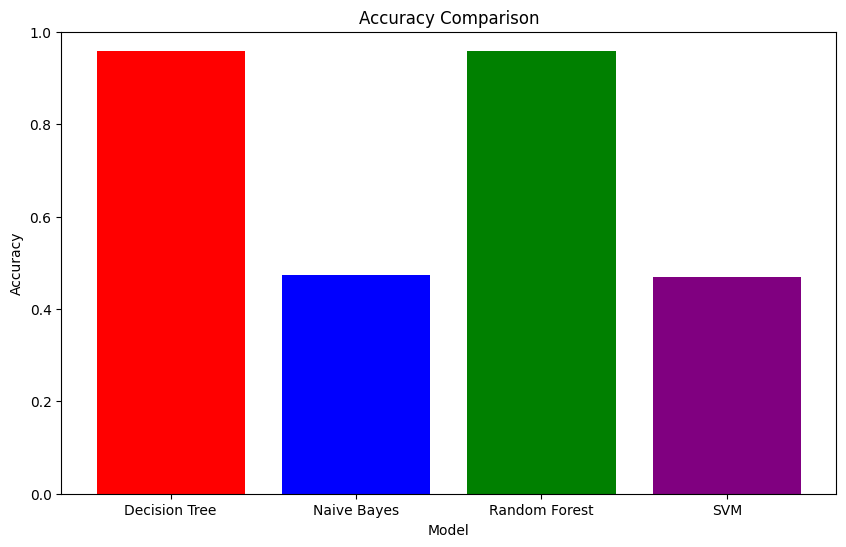

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracy_values = []

# Decision Tree accuracy
accuracy_values.append(accuracy)

# Naive Bayes accuracy
accuracy_values.append(accuracy_nb)

# Random Forest accuracy
accuracy_values.append(accuracy_rf)

# SVM accuracy
accuracy_values.append(fm)

model_names = ['Decision Tree', 'Naive Bayes', 'Random Forest', 'SVM']

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_values, color=['red', 'blue', 'green', 'purple'])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import PipelineModel

# Collect input from the user
PM2 = float(input("Enter the Value of PM2:"))
PM10 = float(input("Enter the Value of PM10:"))
NO = float(input("Enter the Value of NO:"))
NO2 = float(input("Enter the level of NO2:"))
NOx = float(input("Enter the level of NOX:"))
CO = float(input("Enter the value for CO:"))
SO2 = float(input("Enter the level of SO2:"))
O3 = float(input("Enter the level of O3:"))
AQI = float(input("Enter the level of AQI:"))

# Create a Spark DataFrame with the input values
input_data = [(PM2, PM10, NO, NO2, NOx, CO, SO2, O3, AQI)]
columns = ["PM2", "PM10", "NO", "NO2", "NOx", "CO", "SO2", "O3", "AQI"]
input_df = spark.createDataFrame(input_data, columns)

# Use the model to make predictions
predictions = model_rf.transform(input_df)

# Extract the predicted crop
predicted_crop = predictions.select("prediction").collect()[0][0]

print("The Suitable Crop for the given conditions:", predicted_crop)


Enter the Value of PM2:81.40
Enter the Value of PM10:124.50
Enter the Value of NO:1.44
Enter the level of NO2:20.50
Enter the level of NOX:12.08
Enter the value for CO:0.12
Enter the level of SO2:15.24
Enter the level of O3:127.09
Enter the level of AQI:184.0


IllegalArgumentException: ignored